Epoch 0, Loss: 0.2357
Epoch 500, Loss: 0.0647
Epoch 1000, Loss: 0.0675
Epoch 1500, Loss: 0.0673
Epoch 2000, Loss: 0.0694
Epoch 2500, Loss: 0.0678
Epoch 3000, Loss: 0.0645
Epoch 3500, Loss: 0.0684
Epoch 4000, Loss: 0.0690
Epoch 4500, Loss: 0.0674
Epoch 5000, Loss: 0.0668
Epoch 5500, Loss: 0.0683
Epoch 6000, Loss: 0.0684
Epoch 6500, Loss: 0.0661
Epoch 7000, Loss: 0.0684
Epoch 7500, Loss: 0.0639
Epoch 8000, Loss: 0.0672
Epoch 8500, Loss: 0.0699
Epoch 9000, Loss: 0.0689
Epoch 9500, Loss: 0.0664
Epoch 10000, Loss: 0.0684
Epoch 10500, Loss: 0.0632
Epoch 11000, Loss: 0.0713
Epoch 11500, Loss: 0.0682
Epoch 12000, Loss: 0.0642
Epoch 12500, Loss: 0.0678
Epoch 13000, Loss: 0.0677
Epoch 13500, Loss: 0.0695
Epoch 14000, Loss: 0.0697
Epoch 14500, Loss: 0.0691
Epoch 15000, Loss: 0.0653
Epoch 15500, Loss: 0.0697
Epoch 16000, Loss: 0.0674
Epoch 16500, Loss: 0.0633
Epoch 17000, Loss: 0.0667
Epoch 17500, Loss: 0.0672
Epoch 18000, Loss: 0.0679
Epoch 18500, Loss: 0.0664
Epoch 19000, Loss: 0.0698
Epoch 1950

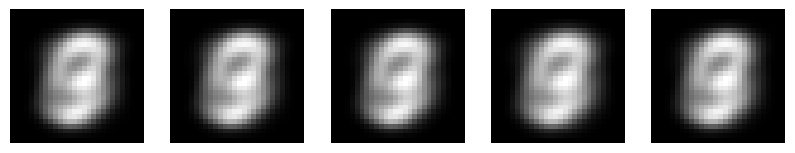

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess MNIST dataset
(x_train, _), (_, _) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype(np.float32) / 255.0  # Normalize to [0,1]
x_train = x_train.reshape(-1, 28*28)  # Flatten to 784-dim vector

# Define model hyperparameters
latent_dim = 100  # Noise input dimension
hidden_dim = 256  # Size of hidden layers
output_dim = 784  # Output size (28x28 pixels)

# Define GMLN Generator
def build_generator():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(hidden_dim, activation='relu'),
        tf.keras.layers.Dense(hidden_dim, activation='relu'),
        tf.keras.layers.Dense(output_dim, activation='sigmoid')  # Output 28x28 image
    ])
    return model

# Instantiate the model
generator = build_generator()

# Define loss and optimizer
loss_fn = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Training function
def train_gmln(epochs=5000, batch_size=128):
    for epoch in range(epochs):
        idx = np.random.randint(0, x_train.shape[0], batch_size)
        real_data = x_train[idx]

        # Generate random noise
        noise = np.random.normal(0, 1, (batch_size, latent_dim))

        # Generate fake data
        fake_data = generator(noise, training=True)

        # Compute loss
        loss = loss_fn(real_data, fake_data)

        # Update generator
        with tf.GradientTape() as tape:
            fake_data = generator(noise, training=True)
            loss = loss_fn(real_data, fake_data)
        grads = tape.gradient(loss, generator.trainable_variables)
        optimizer.apply_gradients(zip(grads, generator.trainable_variables))

        # Print progress
        if epoch % 500 == 0:
            print(f"Epoch {epoch}, Loss: {loss.numpy():.4f}")

# Train the GMLN
train_gmln(epochs=20000)

# Generate and visualize new digits
def generate_samples(n_samples=5):
    noise = np.random.normal(0, 1, (n_samples, latent_dim))
    generated_images = generator(noise).numpy().reshape(-1, 28, 28)

    plt.figure(figsize=(10, 2))
    for i in range(n_samples):
        plt.subplot(1, n_samples, i + 1)
        plt.imshow(generated_images[i], cmap='gray')
        plt.axis('off')
    plt.show()

# Generate and show samples
generate_samples()
